In [1]:
import numpy as np
import cv2
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("./TestImage/chrisHemsworth.jpg")
img.shape

(752, 752, 3)

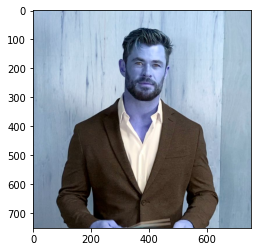

In [3]:
plt.imshow(img)

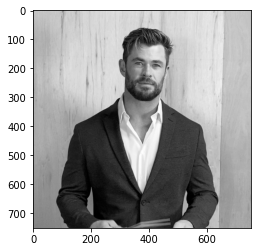

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap = 'gray')

In [5]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

In [6]:
face = face_cascade.detectMultiScale(gray,1.3,5)
face

array([[314, 126, 162, 162]])

In [7]:
(x,y,w,h) = face[0]
x,y,w,h

(314, 126, 162, 162)

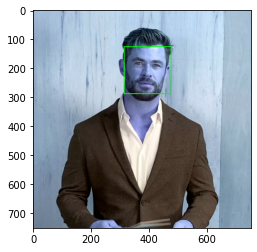

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(face_img)

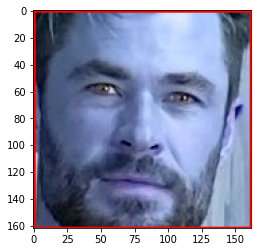

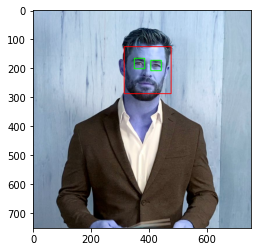

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in face:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+w),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_img = img[y:y+h,x:x+w]
    plt.imshow(roi_img)
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    plt.figure()
    plt.imshow(face_img,cmap='gray')

# To clean faces with  single eye

In [10]:
def get_cropped_img_if_2_eyes(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h ) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

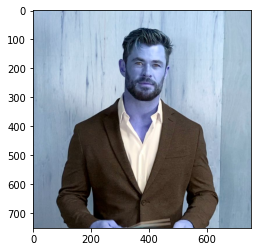

In [11]:
org_img = cv2.imread("./TestImage/chrisHemsworth.jpg")
plt.imshow(org_img)

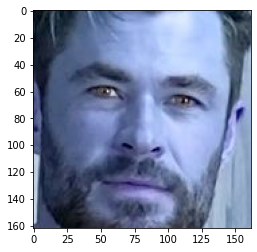

In [12]:
plt.imshow(get_cropped_img_if_2_eyes("./TestImage/chrisHemsworth.jpg"))

In [13]:
pathToDataSetDir = "./DataSet/"
pathToCrpDir = "./DataSet/cropped/"

In [14]:
import os
image_dirs= []


In [15]:
image_dirs

[]

In [16]:
import shutil
if os.path.exists(pathToCrpDir):
    shutil.rmtree(pathToCrpDir)
    for x in os.scandir(pathToDataSetDir):
        if x.is_dir():
            image_dirs.append(x.path)
os.mkdir(pathToCrpDir)

In [17]:
image_dirs

['./DataSet/Chris_Hemsworth',
 './DataSet/Dwayne_Johnson',
 './DataSet/Johnny_Depp',
 './DataSet/Tobey_Maguire',
 './DataSet/Will_Smith']

In [18]:
cropImgDirs = []
HeroFileNameDirs = {}

for img_dir in image_dirs:
    hero_name = img_dir.split("/")[-1]
    count = 1
    HeroFileNameDirs[hero_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = pathToCrpDir + hero_name 
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropImgDirs.append(cropped_folder)
                print("created folder :", cropped_folder)
            HeroFileName = hero_name + str(count) + ".png"
            HeroFilePath = cropped_folder +'/'+HeroFileName
            cv2.imwrite(HeroFilePath,roi_color)
            HeroFileNameDirs[hero_name].append(HeroFilePath)
            count +=1

created folder : ./DataSet/cropped/Chris_Hemsworth
created folder : ./DataSet/cropped/Dwayne_Johnson
created folder : ./DataSet/cropped/Johnny_Depp
created folder : ./DataSet/cropped/Tobey_Maguire
created folder : ./DataSet/cropped/Will_Smith


## after getting cropped image of our heros 
### we had to perform some manual cleaning on the cropped images

In [20]:
cropImgDirs = []
for x in os.scandir("./DataSet/cropped"):
    if x.is_dir():
        cropImgDirs.append(x.path.replace("\\","/"))
cropImgDirs

['./DataSet/cropped/Chris_Hemsworth',
 './DataSet/cropped/Dwayne_Johnson',
 './DataSet/cropped/Johnny_Depp',
 './DataSet/cropped/Tobey_Maguire',
 './DataSet/cropped/Will_Smith']

## After clean some images manualy

In [21]:
HeroFileNameDirs = {}
for path in cropImgDirs:
    name = str(path.split("/")[-1])
    lst = []
    for x in os.scandir(path):
        lst.append(x.path.replace("\\","/"))
    HeroFileNameDirs[name] = lst

In [22]:
HeroFileNameDirs

{'Chris_Hemsworth': ['./DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth1.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth10.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth100.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth101.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth102.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth103.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth105.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth106.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth107.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth108.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth109.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth11.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth110.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth111.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth112.png',
  './DataSet/cropped/Chris_Hemsworth/Chris_Hemsworth113

### wavelet transfrom

In [23]:
import pywt
def w2d(img, mode ="haar",level = 1):
    imArray = img
    # Datatype conversion
    # Convert to GrayScale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY)
    #convert to float 
    imArray = np.float32(imArray)
    imArray /= 255
    # compute coeeficients
    coeffs = pywt.wavedec2(imArray,mode,level=level)
    
    coeffs_H = list(coeffs)
    coeffs_H[0]*=0
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H,mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    return imArray_H

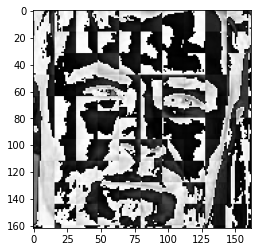

In [25]:
im_haar = w2d(get_cropped_img_if_2_eyes("./TestImage/chrisHemsworth.jpg"),'db1',4)
plt.imshow(im_haar,cmap='gray')

In [26]:
classDict = {}
count = 0
for hero in HeroFileNameDirs.keys():
    classDict[hero] = count
    count +=1
classDict

{'Chris_Hemsworth': 0,
 'Dwayne_Johnson': 1,
 'Johnny_Depp': 2,
 'Tobey_Maguire': 3,
 'Will_Smith': 4}

In [27]:
X,Y = [] ,[]
for heroName , training_images in HeroFileNameDirs.items():
    for training_image in training_images:
        img = cv2.imread(training_image)
        if( img is None) :
            continue
        scalledRawImg = cv2.resize(img,(32,32))
        img_har = w2d(img , 'db1',4)
        scalledImgHar = cv2.resize(img_har,(32,32))
        combinedImg = np.vstack((scalledRawImg.reshape(32*32*3,1),scalledImgHar.reshape(32*32,1)))
        X.append(combinedImg)
        Y.append(classDict[heroName])

In [28]:
len(X[0])

4096

In [29]:
32*32*3 + 32*32

4096

In [30]:
len(X)

563

In [31]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(563, 4096)

 ## Data cleaning process is Done

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=5)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9290780141843972

In [34]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       0.88      1.00      0.93        28
           2       1.00      0.90      0.95        31
           3       0.95      0.86      0.90        21
           4       0.94      0.89      0.92        38

    accuracy                           0.93       141
   macro avg       0.93      0.93      0.93       141
weighted avg       0.93      0.93      0.93       141



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [35]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [36]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [37]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.867115,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.741401,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.867143,{'logisticregression__C': 1}


In [38]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [39]:
best_estimators['svm'].score(X_test,y_test)

0.9361702127659575

In [40]:
best_estimators['random_forest'].score(X_test,y_test)

0.7872340425531915

In [41]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9432624113475178

In [42]:
best_clf = best_estimators['svm']

In [43]:
X_test

array([[ 98., 111., 116., ..., 234., 241.,  64.],
       [ 75.,  82.,  92., ...,   7., 161., 225.],
       [211., 164., 117., ..., 252.,   9., 253.],
       ...,
       [  9.,  16.,  36., ...,   1.,   0.,   1.],
       [ 22.,  19.,  16., ...,   2.,   3.,   1.],
       [ 77.,  89.,  93., ...,  22.,  16.,  11.]])

In [44]:
best_clf.predict_proba([X_test[0]])*100

array([[ 2.01316184, 91.9900009 ,  4.19135346,  0.67925835,  1.12622546]])

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[23,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0],
       [ 0,  1, 28,  0,  2],
       [ 1,  0,  0, 20,  0],
       [ 1,  4,  0,  0, 33]], dtype=int64)

Text(69.0, 0.5, 'Truth')

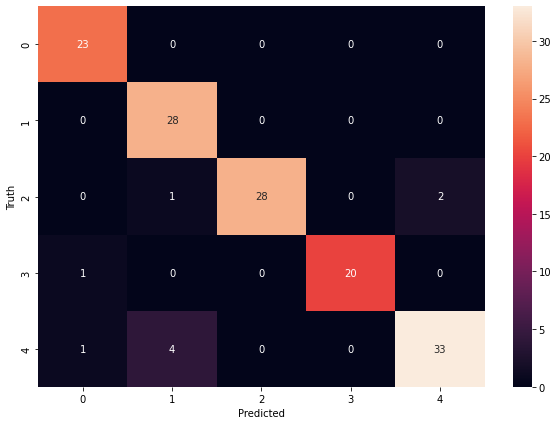

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
classDict

{'Chris_Hemsworth': 0,
 'Dwayne_Johnson': 1,
 'Johnny_Depp': 2,
 'Tobey_Maguire': 3,
 'Will_Smith': 4}

# Save Model

In [49]:

import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

# save class dictionary

In [51]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(classDict))